# 추천 시스템

## 1. 추천 시스템이란?

- 사용자의 정보 데이터 분석 -> 사용자 취향에 맞는 알고리즘
- 고객: 만족도 증가 / 기업: 매출 증가

<span style="background-color:#DCFFE4"> 1-1. 사용되는 데이터 </span>
1. 명시적 데이터
- 사용자가 선호도 직접적으로 표현한 데이터
- 고객이 입력
- ex) 평점, 좋아요, 투표
- 사용자 취향 정확 반영 but 데이터 자체를 얻기 힘듦

2. 암시적 데이터
- 고객의 행동 기반 데이터
- 사용자가 선호도 간접적으로 표현
- ex) 조회수, 구매 기록
- 데이터 얻기 쉬움 but 취향 직접적 파악 힘듦

<span style="background-color:#DCFFE4"> 1-2. 추천시스템 분류 </span>
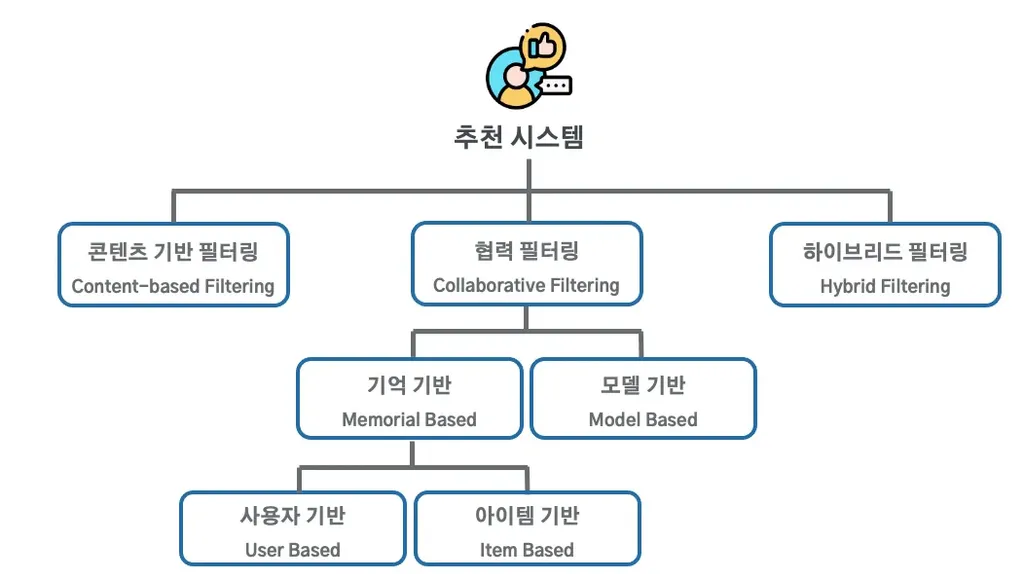
1. 내용 기반 필터링
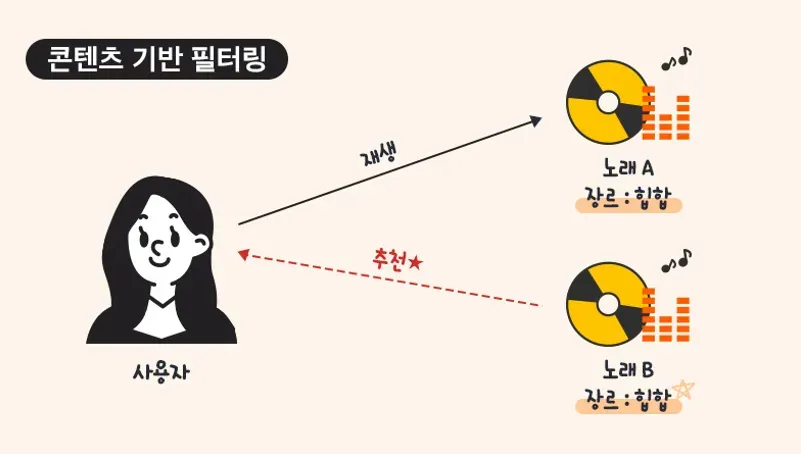
- 콘텐츠 내용의 유사도 기반
- 사용자가 이용한 아이템과 비슷한 아이템 추천 (행동 이력 기준)

2. 협업 필터링
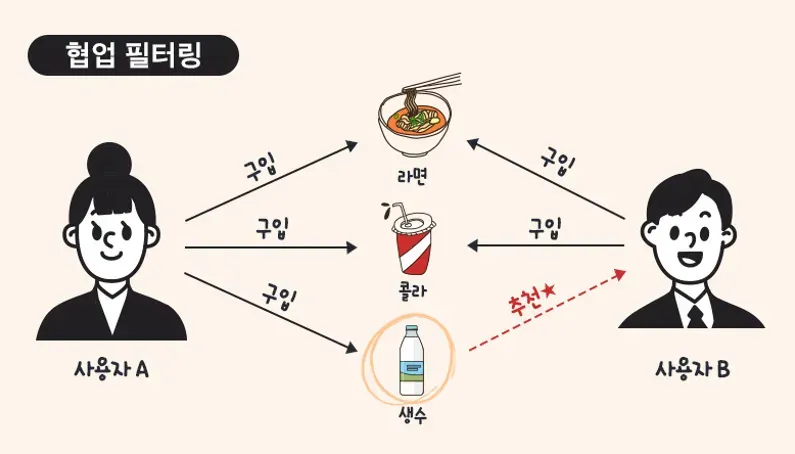
- 다른 다수의 사용자 정보 기반 추천
- 사용자 기반: 유사한 취향의 다른 사용자 선호 아이템 추천
- 아이템 기반: 사용자 선호 아이템과 유사한 아이템 추천

3. 하이브리드 필터링
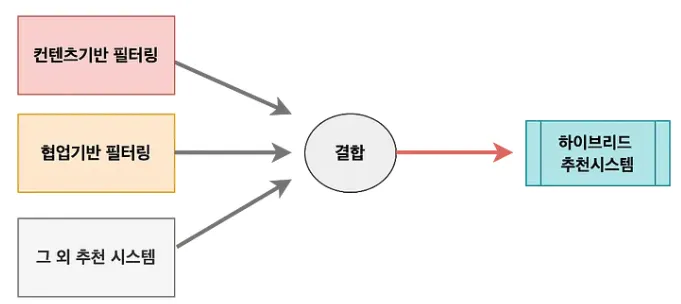
- 2가지 이상의 추천시스템 알고리즘 조합
- 개별 방법의 단점 보완
- weighted ensembel / minxed / switch / feature combination / meta-level

## 2. 내용 기반 필터링

- 사용자 프로필(사용자 선호 특징 모아놓은 데이터) & 아이템 특징 일치도 계산    
    => 일치도 높을 수록 사용자가 좋아할 확률 큼
- 콘텐츠 유사도 기반 추천

<span style="background-color:#DCFFE4"> 2-1. 유사도 </span>

### 개념
- 아이템 정보 데이터 벡터화 -> 벡터 간 유사도 측정
- 고객 선호 아이템과 비교 -> 유사도 높은 아이템 선별

### 과정
1. input 데이터 생성
- 아이템 정보 활용 (feature)
- 테이블 형태로 정리
- 원-핫 인코딩 (숫자로 변환)

2. 유저 정보 활용
- 유저 취향 파악
- 유저를 n개의 피처로 표현 (아이템과 동일한 기준)

3. 벡터 내적 & 유사성
- 내적 값 큼 = 두 벡터 유사성 높음

4. 유사도 방식
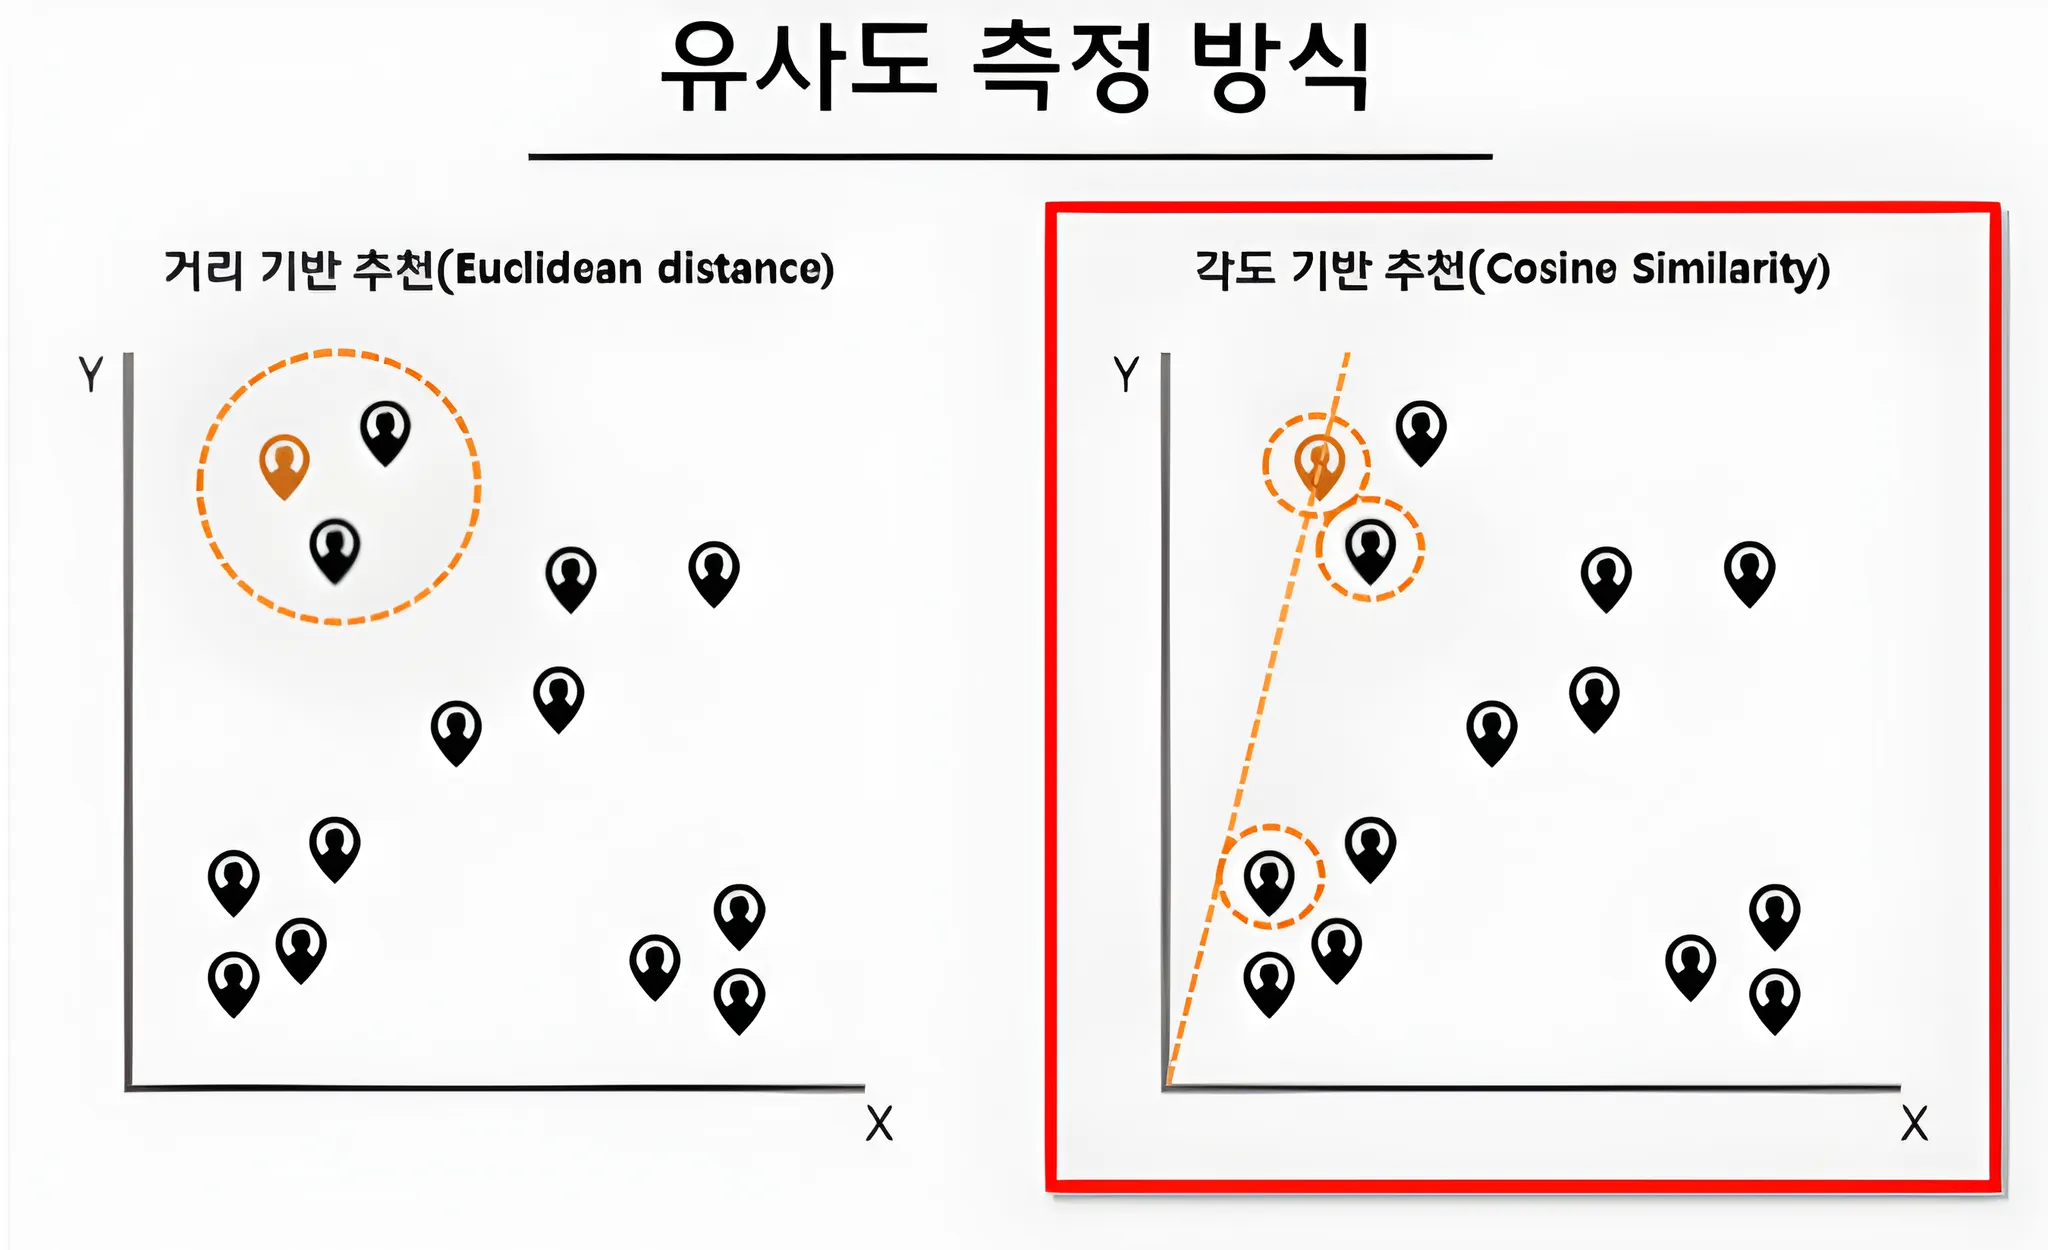
- 자카드 유사도(집합): 집합 간 교집합 크기
- 코사인 유사도(각도): 벡터 사이 각도 작음 -> 유사
- 유클리디안 거리(거리): 벡터 사이 거리 작음 -> 유사
- 피어슨 상관계수(상관관계): 벡터 간 선형 상관 관계

<span style="background-color:#DCFFE4"> 2-2. 사용자 프로필 </span>

### 종류
1. 직접 지정형: 사용자가 명시적으로 자신의 선호 지정
2. 간접 지정형: 사용자의 행동 이력 기반 프로필 작성

### 과정
1. 특성 가중치: 사용자가 가진 아이템 특성 가중치 평균값 활용
2. 설문조사, 키워드 입력 -> 프로필 획득
3. 유저의 아이템 기존 평가 바탕 -> 분류     
=> 명시적 + 암묵적 혼합 사용!

<span style="background-color:#DCFFE4"> 2-3. 아이템 특징 </span>
- 아이템을 벡터 형태로 표현 (도메인에 따라 다른 방법 적용)
- 컨텐츠 내용 분석: Clustering, Machine Learning, TF-IDF

### TF-IDF
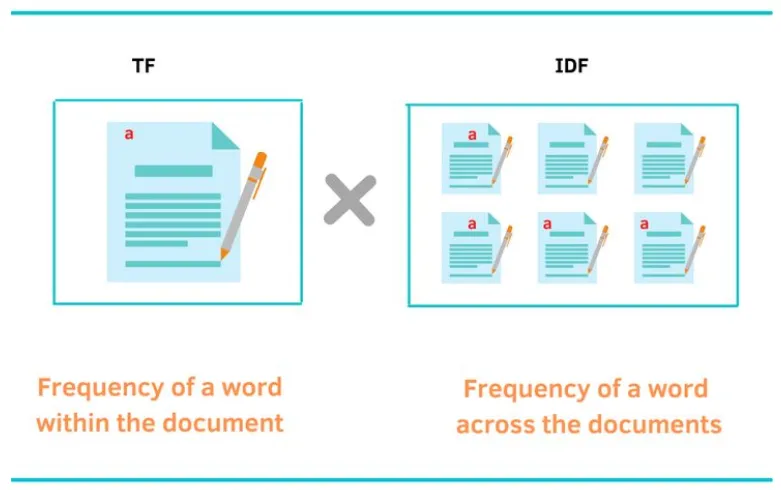
- 특정 문서 내 단어 등장 정도 뜻하는 단어 빈도(TF) + 전체 문서 내 단어 등장 정도 뜻하는 역문서 빈도(IDF) -> 문서 내 단어 가중치 계산
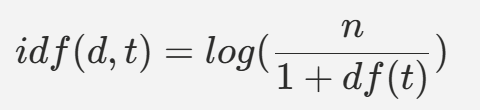
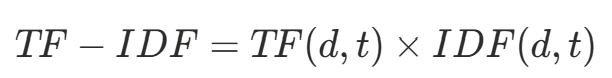     
=> 각 단어가 문서에서 얼마나 중요한지를 나타냄!
```
TfidVectorizer()
fit_transform()
cosine_similarity()
```

<span style="background-color:#DCFFE4"> 2-4. 장단점 </span>
### 장점
- 콜드 스타트 문제 해결 가능 (시스템 구동 위한 충분한 정보 부족)
- feature 기반 추천 -> 추천 이유 설명 용이

### 단점
- feature 추출 성능 -> 정확도 영향
- 기존과 유사한 아이템 추천 -> 새 장르 아이템 추천 어려움


## 3. 협업 필터링

- 기존 사용자 - 아이템 상관 관계 -> 새 사용자 - 아이템 상관 관계 예측
- 여러 사용자 평점 기반

<span style="background-color:#DCFFE4"> 3-1. 메모리 기반 협업 필터링 </span>

### 개념
- 이웃 기반 협업 필터링
- 사용자 - 아이템 유사도 기반

### 접근법
1. 사용자 기반       
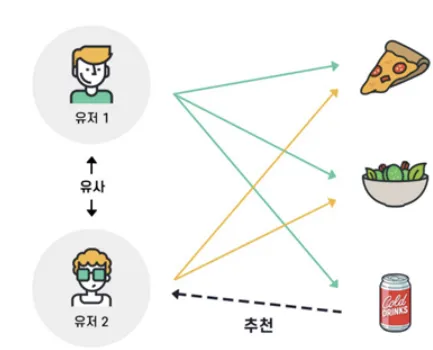          
- 특정 사용자 - 타 사용자 유사도 측정 -> 가장 유사도 높은 사용자 추출해 그 사용자가 선호하는 아이템 추천
- 유저 간 유사도 높음 -> 가중치 부여
- 추천 범위 다양함
- 사용자 유입 적은 환경에 유리

2. 아이템 기반       
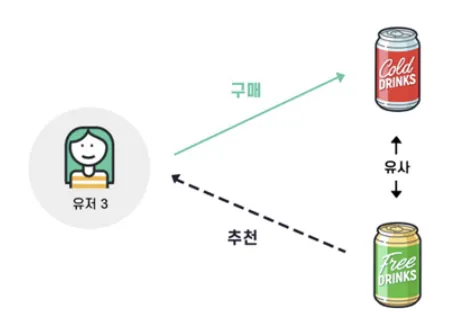             
- 추천 아이템과 유사한 아이템 평점 활용
- 계산이 빠름
- 사용자 유입 많은 환경에 유리

### 한계
- 아이템, 유저 늘어남 -> 확장성 떨어짐
- 기반이 되는 데이터(평점, 선호도) 부족 -> 성능 저하

<span style="background-color:#DCFFE4"> 3-2. 모델 기반 협업 필터링 </span>

### 개념
- 잠재 요인 협업 필터링
- 사용자 - 아이템 협업 행렬 속 잠재 요인 추출 -> 추천 예측
- 단순히 유사도에 의존하는 메모리 기반 협업 필터링의 한계 극복

### 과정
1. 잠재 요인: 사용자 - 아이템 관계 설명하는 숨겨진 특성
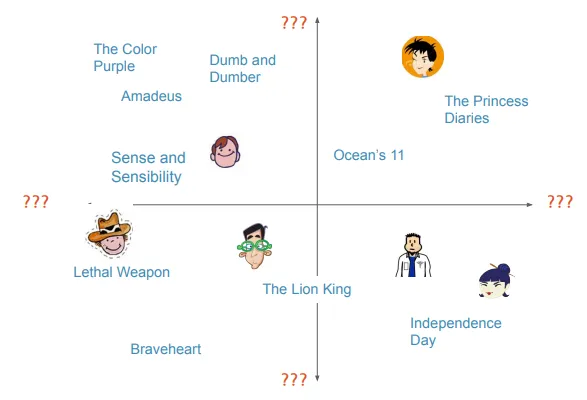     
2. Latent Factor Model: 숨겨진 특성 찾기 위해 사용자-잠재요인, 아이템-잠재요인으로 분해하여 학습      
=> 사용자와 아이템을 잠재적 차원을 사용해 나타낼 수 있음
3. 행렬 분해 (Matrix Factorization)
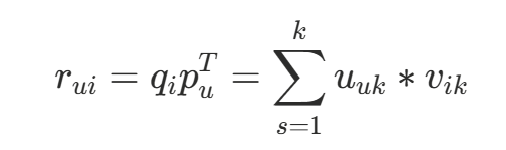
- 선호도: user/item latent matrix 벡터의 내적 -> 평점 예측
- SVD, SGD, NMF, PMF

## 4. 추천시스템 평가
1. 오프라인 평가
- 과거의 로그 -> 예측 정밀도 평가
- 평가 비용 낮음, 데이터 풍부
- 실시간 연동 X -> 실제 모델 배포 시 성능 저하 가능성
- 예측 오차 지표, 집합 평가 지표, 순위 평가 지표 등
2. 온라인 평가
- 일부 사용자에게 새 인터페이스 실제 표시 -> 평가 수행
- 구현 비용 높음, 성능 안 좋으면 만족도 감소
- A/B 테스트, 인터리빙
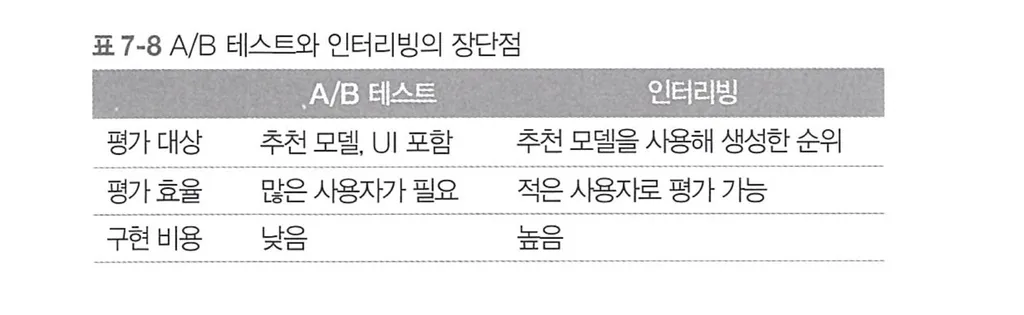      
3. 사용자 스터디
- 사용자에게 인터뷰, 설문
- 직접적인 피드백 발견
- 주관 기반 -> 분산 큼

## 5. 최근 추천시스템 연구 동향
- 자연어 처리 기술 기반 연구 활발
- Transformer, GRU 활용

# 연관 분석 기초

## 1. 연관 분석이란?

<span style="background-color:#DCFFE4"> 1-1. 연관 분석의 정의 </span>
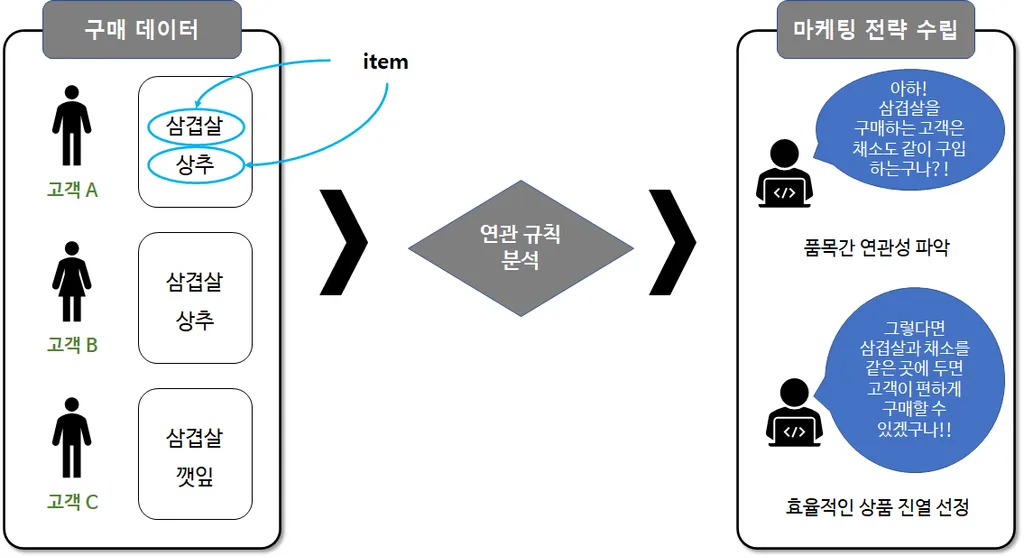
- 일련의 거래나 사건 안에 존재하는 항목 간의 일정한 연관 규칙을 발견하는 분석
- 장바구니 분석
- 비지도 학습
- 연관분석 알고리즘: Apriori, FP-Growth

<span style="background-color:#DCFFE4"> 1-2. 연관규칙 분석 </span>

### 형태
- 조건절: 만일 ~라면
- 결과절: 조건절의 뒷부분
- 아이템 집합: 조건절, 결과절 구성하는 아이템 집합 (상호 배반)
ex) 라면을 구매하는 사람들은 달걀도 함께 산다.     
=> 조건절: 라면 구매, 결과절: 달걀 구매, 아이템 집합: 라면/달걀

### 주의
- 상관관계 파악 O, 인과관계 파악 X     
    => why? 그저 관찰 데이터 & 수학적 비율

### 연관 분석 vs 협업 필터링
#### 연관 분석
- 교집합 기반
- 특정 상품 포함 데이터에서 다른 상품 비율 계산
- 상품과 연관성 높은 상품 -> 다양한 세트 추출 가능!

### 협업 필터링
- 상관관계 기반
- 특정 상품 포함 데이터 <-> 다른 상품 데이터 비교
- 사용자 개인 선호도 -> 선호 상품 추출 가능!
- 개인화된 상품 추천에 자주 활용

## 2. 주요 개념
<span style="background-color:#DCFFE4"> 2-1. 연관규칙 조건 </span>
1. 두 품목이 함께 구매한 경우의 수 >= 일정 수준
- 일정 이상의 지지도 필요
- 지지도: 전체 항목 중 A, B 동시 포함하는 거래 비율
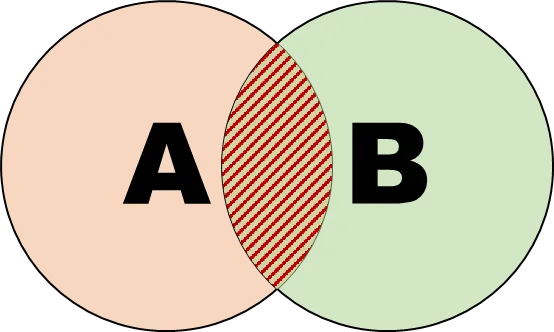

2. A 포함 거래 중 B 구입 경우의 수 >= 일정 수준
- 일정 이상의 신뢰도 필요
- 신뢰도: A 포함 거래 중 A와 B 동시 포함 거래 비율     
    => 지지도 / P(A)
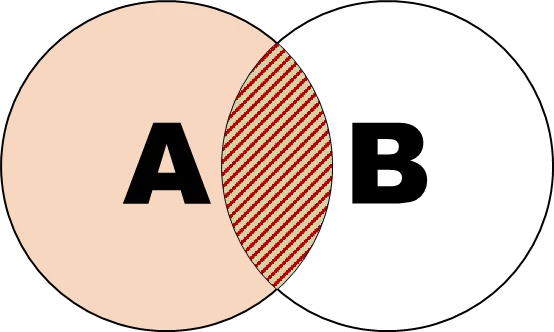

<span style="background-color:#DCFFE4"> 2-2. 연관분석 평가 측도 </span>
### 향상도
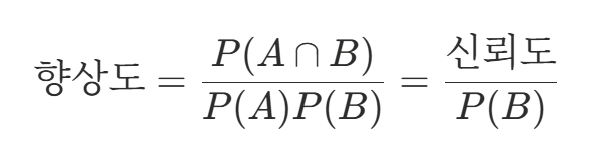
- A가 주어지지 않을 때 B 확률 대비 A가 주어졌을 때 B 확률 증가 비율
- 향상도 > 1: 양의 상관관계, 우연적 기회보다 높은 확률
- 향상도 = 1: 독립
- 향상도 < 1: 음의 상관관계, 우연적 기회보다 낮은 확률

## 3. 활용 사례
<span style="background-color:#DCFFE4"> 3-1. 넷플릭스 </span>
- <하우스 오브 카드> 성공 사례
- 지지도: 하우스 오브 카드 본 사람 중 케빈 스페이시 출연 콘텐츠 본 사람 많음 -> 지지도 높음!
- 신뢰도: P(끝까지 시청 | 데이비드 핀처 감독 콘텐츠 시청) 높음
- 향상도: 영국판 하우스 오브 카드 시청, 케빈 스페이시 콘텐츠 시청 향상도 > 1: 독립 아님!

## 4. 연관 분석 알고리즘
<span style="background-color:#DCFFE4"> 4-1. Apriori 알고리즘 </span>

### 개념
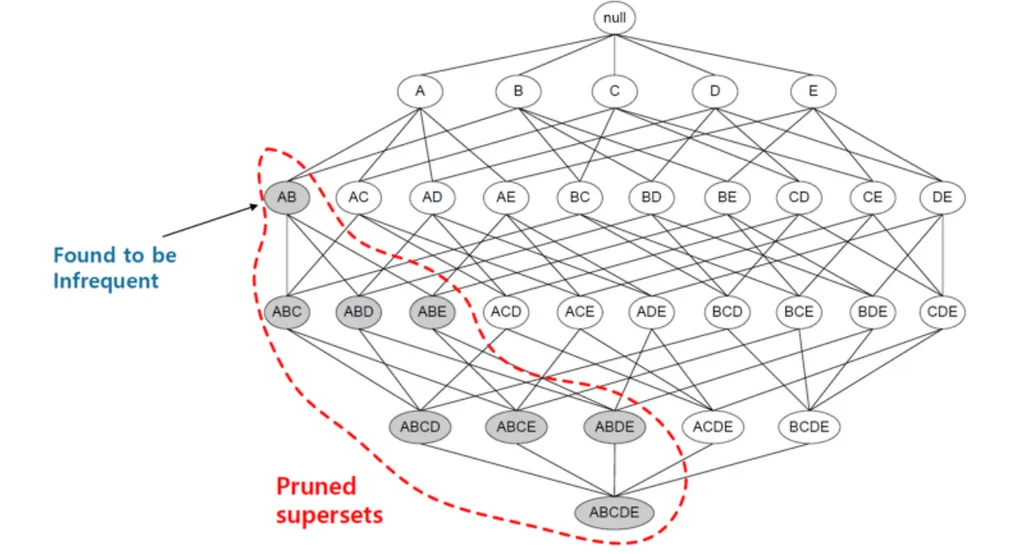
- 선험적 경험 이용
- 가능한 모든 조합 시도는 비효율적 -> 상위 조합부터 스캔하며 자주 발생하지 않는 조합은 후속 조합까지 모두 배제     
=> 연산량 줄이기 가능!
- 최소 지지도 넘기지 못하면 제거

### 과정
1. 단일 항목 집합 생성: 지지도 계산 -> 최소 지지도 이상만 넘김
2. 2개 항목 집합 생성: 똑같이 최소 지지도 이상만 넘김
3. 더 큰 항목 집합 생성: 조합 생성 불가할 때까지 반복
4. 최종 빈발 항목 집합 선정: 연관규칙 생성 & 지지도, 신뢰도, 향상도 계산 

### 장점
- 상품 개수가 많을 때에도 패턴 발견 쉬움
- 다른 연구가설 탐지 가능
- 원리 간단, 이해분석 용이

### 단점
- 현실적인 중요 연관 규칙 부족
- 데이터 커지면 속도 느려짐

```
apriori()
association_rules()
sort_values()
```

<span style="background-color:#DCFFE4"> 4-2. FP Growth 알고리즘 </span>

### 개념
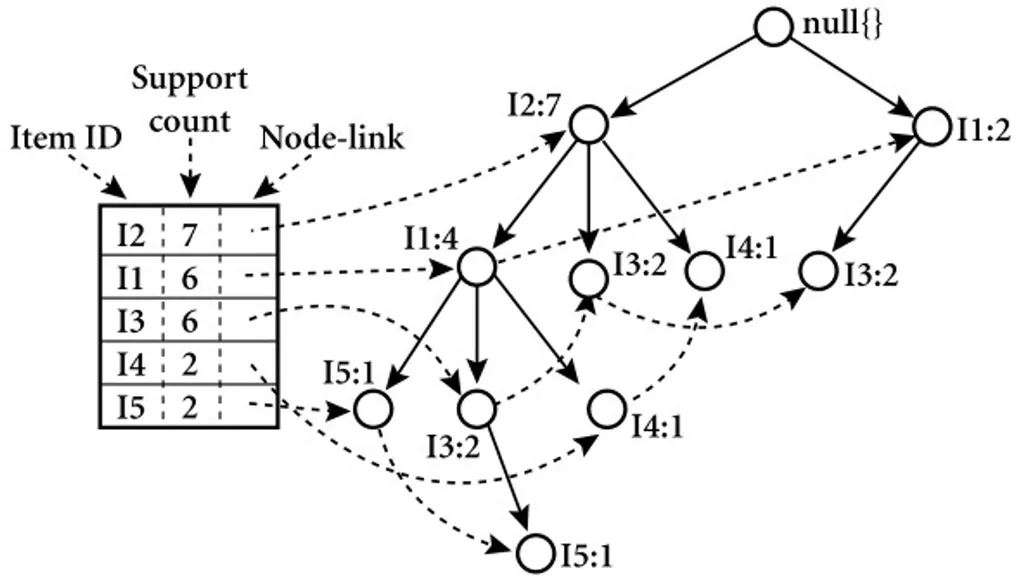
- Apriori의 단점 중 하나인 데이터 커질 시 속도 느려지는 문제 해결
- FP-Tree 구조 이용
- 각 아이템마다 지지도 계산 -> 최소 지지도 이상 아이템만 선택     
    => 부모 노드 중심으로 자식 노드 추가

### 과정
1. 빈발 항목 필터링: 모든 항목 빈도 계산 -> 최소 지지도 이상만 남김
2. 데이터 재정렬: 빈도순 재정렬
3. FP-Tree 생성: 동일 항목 - 기존 노드 연결, 새 항목 - 새 노드 추가
4. 빈발 항목 집합 추출: 특정 항목 기준 부분 트리 생성 -> 빈발 항목 추출
5. 연관 규칙 도출: 지지도, 신뢰도, 향상도 지표 계산 -> 가장 유용한 규칙 선택

### 장점
- 데이터 두 번만 스캔 -> 속도 빠름
- Tree만 구성하면 끝

### 단점
- 대용량 데이터셋에서 메모리 효율적 사용 X
- 설계 어려움

```
fpgrowth()
association_rules()
```